In [97]:
import func
import svd
import pandas as pd

In [98]:
# 데이터 불러오기
def load_recipe_splited(path = 'oracle', rows = 500):
    if path == 'oracle':
        data  = func.load_recipe(n = rows)
        data2 = func.recipe_preprocessing(data)
        data3 = func.split_ingredient(data2)
        return data3

    if path == 'csv' :
        data = pd.read_csv(r'process_ingre.csv')
        return data.iloc[:rows]

recipe_raw = load_recipe_splited(path = 'csv', rows = 150000)
recipe = recipe_raw.iloc[:10000].copy()

C:\Users\HwijunKwon\AppData\Local\Temp\ipykernel_14364\3939165418.py:10: DtypeWarning: Columns (68,71,74,77,80,83,86,89,90,92,93,95,96,98,99,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,180,181,182,183,184,185,186,187,188,189,190,192,193,195,196,197,198,199,200,201,202,203,204,205,207,208,210,211,213,214,216,217,218,219,220,222) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'process_ingre.csv')


In [100]:
# ingre_weight : 식재료별 무게 --> ingre_gram : 식재료별 무게(gram으로)
ingre_weight = pd.read_csv(r'data\ingre_weight.csv')

# 150g~200g -> 175 로 변환 후 저장
def weight2gram(ingre_weight):
    import datetime
    now = datetime.datetime.now().strftime('%Y-%m-%d_%H%M')
    def average_gram(무게):
        if "~" in 무게 :
            min, max = 무게.split("~")
            min = min.replace("g", "")
            max = max.replace("g", "")
            return (int(min)+int(max))/2
        else:
            return int(무게.replace("g", ""))
    ingre_weight["g"] = ingre_weight["무게"].apply(average_gram)
    ingre_weight.to_csv("data/ingre_weight_" + f"{now}" +".csv")
    return ingre_weight

ingre_gram = weight2gram(ingre_weight)

In [101]:
# unit_list: 단위 사전 txt -> 딕셔너리에 담기
with open("unit_gram.txt", "r", encoding="utf-8") as f:
  data = f.readlines()
df = pd.DataFrame(data, columns=["raw"])
def process(x) :
    return pd.Series(x.replace("'", "").replace(", \n", "").replace(",\n", "").replace("\'", "").replace(" ", "").split(":"))

df[["unit", "gram"]] = df['raw'].apply(process)
unit_list = dict(zip(df.unit, df.gram)) #unit_list: {'작은술': '5',  't': '5',  '티스푼': '5'}

In [102]:
# change_unit 
def change_unit(row):
    def gae2gram(unit): # 식재료를 넣으면 1개의 무게가 나오는 함수 EX) gae2gram('양파') = 175
      gae_gram = dict(zip(ingre_gram.품목, ingre_gram.g ))
      return gae_gram.get(unit, 100)
    
    def unit2gram(unit): # 식재료를 넣으면 g이 나오는 함수 EX) unit2gram('t') = 5
      return unit_list.get(unit, 1)
    unit_idx = [idx for idx, col in enumerate(recipe.columns) if 'unit' in col]
    gae_idx = []
    for idx, value in enumerate(row) :
      if value == '개' and idx >= 2:
        row[idx] = gae2gram(row[idx-2])
      elif idx in unit_idx  : 
        row[idx] = unit2gram(row[idx])
      pass
    return row


In [ ]:
recipe_after = recipe.apply(change_unit, axis =1) #15만개에 3분

In [103]:
recipe_raw = recipe.copy()
recipe_raw.shape

(10000, 223)

In [13]:
matrix

NameError: name 'matrix' is not defined

In [14]:
# 매트릭스로 변환하기 
import func
matrix = func.recipe_food_matrix(recipe_after.iloc[:1000])


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:00<00:00, 1277.41it/s]


In [105]:
matrix

,알밤,토종닭,다담부대찌개양념,말링표고버섯,감자중간크기,반건조오징어,와사비,생강즙,연두청양초,문어숙회,...,자숙문어,돼지호박,빨간파프리카,꼬마새송이버섯,소고기다짐육,계핏가루,석류알맹이,크래미,마른고추,모듬콩
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 매트릭스 변환 하기

In [106]:
matrix = matrix_raw.copy() #matrix_raw = matrix.copy()

In [107]:
def not_only_one(df):
    column_value_counts  = df.nunique(axis=0)
    column_names = column_value_counts[column_value_counts >= 2].index
    df_not_only_one_col = df[column_names].copy()
    print("칼럼 수 변화: " + f"{df.shape[1]} -> {df_not_only_one_col.shape[1]}")

    df_not_only_one_row = df_not_only_one_col[df_not_only_one_col.nunique(axis =1) >= 2].copy()
    print("행의 수 변화: " + f"{df_not_only_one_col.shape[0]} -> {df_not_only_one_row.shape[0]}")
    return  df_not_only_one_row

matrix = not_only_one(matrix)

칼럼 수 변화: 1158 -> 1158
행의 수 변화: 1000 -> 1000


In [108]:
matrix_raw = matrix.copy()
# nan 1000개 이상인 칼럼 제거
matrix = matrix[matrix.columns[(matrix.isna().sum() < 1000)]].copy()

In [113]:
title = matrix['recipe_title']

In [122]:
matrix.isna().sum()

recipe_title    0
알밤              0
토종닭             0
다담부대찌개양념        0
말링표고버섯          0
               ..
계핏가루            0
석류알맹이           0
크래미             0
마른고추            0
모듬콩             0
Length: 1158, dtype: int64

In [148]:
idx = ((matrix!= 0.0).sum() >= 2)# 2번 이상 등장한 레시피 
matrix_reduced = matrix[matrix.columns[idx]].copy()

In [149]:
from sklearn.preprocessing import StandardScaler

def normalizing(df):
    if 'recipe_title' in df.columns :
        df = df.drop('recipe_title', axis =1).copy()
    else : 
        pass
    for col in df.columns:
        data = df[col]
        min = data.min()
        max = data.max()
        df[col] = (data-min)/(max-min)
    return df

matrix_norm = normalizing(matrix_reduced)

In [164]:
input = matrix_norm.drop(columns=["recipe_title"]).copy()

KeyError: "['recipe_title'] not found in axis"

In [202]:
import numpy as np
from scipy.sparse import linalg
recipe_sparse = sparse.csr_matrix(input)
u, s, v = linalg.svds(recipe_sparse)

NameError: name 'sparse' is not defined

In [165]:
from scipy.sparse.linalg import svds

U, S, V = svds(matrix_norm.values)


In [166]:
from scipy import linalg
import numpy as np
def matrix_decomposition(df, n = 100):
    U, S, V = linalg.svd(df.values)
    recipe_represented = U[:, :n]@np.diag(S[:n])
    ingredient_represented = V[:, :n]@np.diag(S[:n])
    print(f"{df.shape[0]}개의 레시피, {df.shape[1]}개의 식재료 -> {n}차원으로 재표현 완료")
    return recipe_represented, ingredient_represented

recipe_vec, ingre_vec = matrix_decomposition(matrix_norm, n = 100)

1000개의 레시피, 424개의 식재료 -> 100차원으로 재표현 완료


In [167]:
column_value_counts  = matrix.nunique(axis=0)
column_names = column_value_counts[column_value_counts >= 10].index

In [168]:
column_value_counts[column_names]

recipe_title    988
고추가루             10
맛술               10
밀가루              11
새우               12
고추장              14
당근               16
물                44
진간장              11
올리고당             12
식용유              14
무                14
계란               10
대파               17
부침가루             13
콩나물              16
돼지고기             16
애호박              13
떡볶이떡             13
모짜렐라치즈           10
소금               17
깻잎               11
버터               12
소고기              11
우유               26
마늘               12
참기름              11
감자               16
카레가루             10
양파               20
생크림              10
부추               16
양배추              15
두부               16
간장               18
쌀                10
설탕               24
김치               15
베이컨              11
후추               10
dtype: int64

In [94]:
matrix_raw.recipe_title[matrix_raw.모짜렐라치즈 != 0.0].index

Int64Index([140, 218, 375, 415, 567, 651, 674, 724, 731, 835, 871, 941], dtype='int64')

In [84]:
column_names 

Index(['고추가루', '맛술', '밀가루', '새우', '고추장', '당근', '물', '진간장', '올리고당', '식용유', '무',
       '계란', '대파', '부침가루', '콩나물', '돼지고기', '애호박', '떡볶이떡', '모짜렐라치즈', '소금', '깻잎',
       '버터', '소고기', '우유', '마늘', '참기름', '감자', '카레가루', '양파', '생크림', '부추', '양배추',
       '두부', '간장', '쌀', '설탕', '김치', '베이컨', '후추'],
      dtype='object')

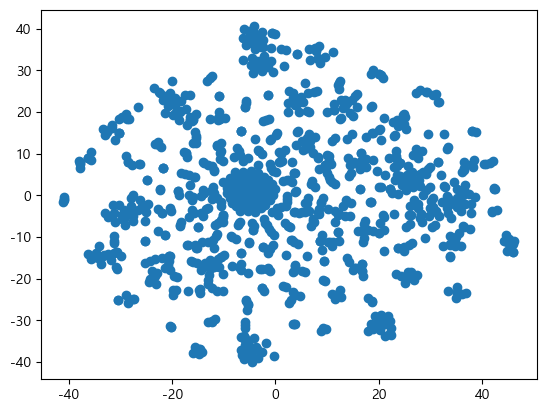

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# tsne를 사용하여 차원 축소를 수행합니다.
tsne = TSNE(n_components=2)
reduced_recipe = tsne.fit_transform(recipe_vec)

# 축소된 데이터를 시각화합니다.
plt.scatter(reduced_recipe[:, 0], reduced_recipe[:, 1])
plt.show()

In [33]:
first_recipe_index = 0

# 축소된 데이터에서 첫 번째 레시피와 가장 가까운 레시피의 인덱스를 찾습니다.
closest_recipe_index = np.argmin(np.linalg.norm(reduced_recipe - reduced_recipe[first_recipe_index], axis=1))

# 가장 가까운 레시피의 인덱스를 출력합니다.
print(closest_recipe_index)

0


In [174]:
matrix_reduced

,recipe_title,알밤,반건조오징어,생강즙,쪽파,순두부,박력분,톳,자른미역,단무지,...,쌀뜨물,찬밥,꽃게,집간장,토마토,김칫국물,멸치육수,소라,소고기다짐육,크래미
0,호박 새우젓찌개 만드는 방법~★,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,바글바글 전복 된장찌개,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,순두부찌개....오도독 씹히는 미더덕이 들어간 순두부찌개!!,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,정통 바지락 순두부 찌개,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,크림토마토 비프 스튜,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,초간단 코코넛로쉐~*,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,손쉬운 갈치조림,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,고등어 조림,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
998,삼치감자조림,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [175]:
matrix_reduced

,recipe_title,알밤,반건조오징어,생강즙,쪽파,순두부,박력분,톳,자른미역,단무지,...,쌀뜨물,찬밥,꽃게,집간장,토마토,김칫국물,멸치육수,소라,소고기다짐육,크래미
0,호박 새우젓찌개 만드는 방법~★,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,바글바글 전복 된장찌개,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,순두부찌개....오도독 씹히는 미더덕이 들어간 순두부찌개!!,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,정통 바지락 순두부 찌개,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,크림토마토 비프 스튜,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,초간단 코코넛로쉐~*,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,손쉬운 갈치조림,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,고등어 조림,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
998,삼치감자조림,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


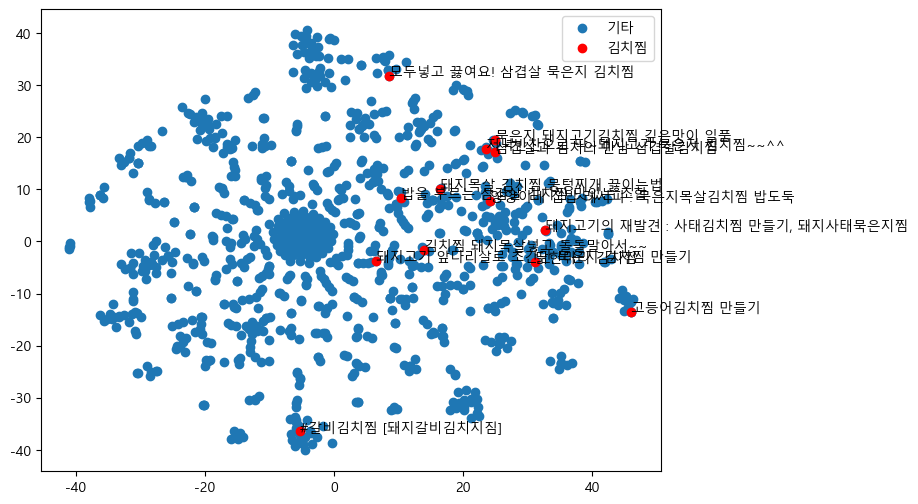

In [171]:


# tsne를 사용하여 차원 축소를 수행합니다.


# 첫 번째 레시피의 인덱스를 가져옵니다.
first_recipe_index = 0

# 축소된 데이터에서 첫 번째 레시피와 가장 가까운 레시피의 인덱스를 찾습니다.
closest_recipe_index = np.argmin(np.linalg.norm(reduced_recipe - reduced_recipe[first_recipe_index], axis=1))

# 첫 번째 레시피와 가장 가까운 레시피의 인덱스를 가져옵니다.
second_recipe_index = np.argmin(np.linalg.norm(reduced_recipe - reduced_recipe[first_recipe_index + 1], axis=1))

# 축소된 데이터를 시각화합니다.
plt.figure(figsize=(8, 6))
plt.scatter(reduced_recipe[:, 0], reduced_recipe[:, 1])

# 첫 번째 레시피와 가장 가까운 레시피의 좌표를 가져옵니다.
first_recipe_coordinate = reduced_recipe[first_recipe_index]
second_recipe_coordinate = reduced_recipe[second_recipe_index]
recipe_title = matrix_raw.recipe_title
# 첫 번째 레시피와 가장 가까운 레시피의 타이틀을 그래프에 표시합니다.
idx =  [i for i, food_name in enumerate(recipe_title) if "김치찜" in food_name]
for i in idx :
    plt.annotate(recipe_title[i], reduced_recipe[i], size = 10)
    plt.scatter(reduced_recipe[i, 0], reduced_recipe[i, 1], c= 'red')
plt.legend(["기타", "김치찜"], loc="upper right")
plt.show()


In [183]:
from scipy.spatial.distance import cosine

In [185]:
reduced_recipe

array([[-40.977814 ,  -0.944333 ],
       [  3.6497777, -30.767414 ],
       [ 28.308107 ,  -6.41721  ],
       ...,
       [ 35.150337 , -21.978403 ],
       [ 40.670113 ,   7.60389  ],
       [-11.280586 , -23.045418 ]], dtype=float32)

In [184]:
closest_recipe_index = np.argmax(cosine(reduced_recipe[0], reduced_recipe))

ValueError: Input vector should be 1-D.

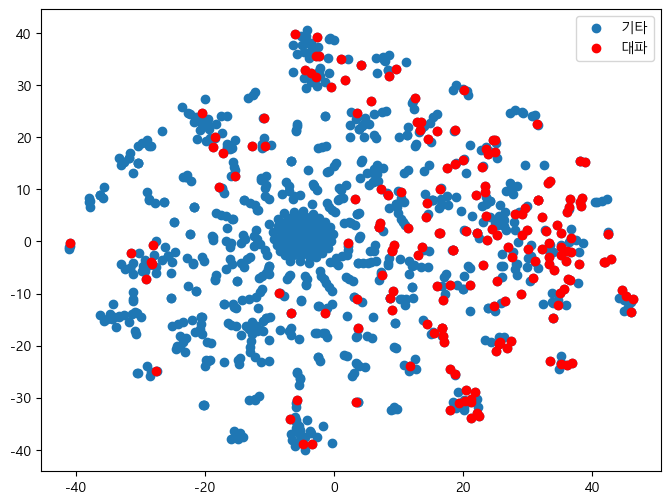

In [182]:
# tsne를 사용하여 차원 축소를 수행합니다.


# 첫 번째 레시피의 인덱스를 가져옵니다.
first_recipe_index = 0

# 축소된 데이터에서 첫 번째 레시피와 가장 가까운 레시피의 인덱스를 찾습니다.
closest_recipe_index = np.argmin(np.linalg.norm(reduced_recipe - reduced_recipe[first_recipe_index], axis=1))

# 첫 번째 레시피와 가장 가까운 레시피의 인덱스를 가져옵니다.
second_recipe_index = np.argmin(np.linalg.norm(reduced_recipe - reduced_recipe[first_recipe_index + 1], axis=1))

# 축소된 데이터를 시각화합니다.
plt.figure(figsize=(8, 6))
plt.scatter(reduced_recipe[:, 0], reduced_recipe[:, 1])

# 첫 번째 레시피와 가장 가까운 레시피의 좌표를 가져옵니다.
first_recipe_coordinate = reduced_recipe[first_recipe_index]
second_recipe_coordinate = reduced_recipe[second_recipe_index]
recipe_title = matrix_reduced.recipe_title
# 첫 번째 레시피와 가장 가까운 레시피의 타이틀을 그래프에 표시합니다.
idx =  matrix_raw.recipe_title[matrix_reduced.대파 != 0.0].index
for i in idx :
    
    plt.scatter(reduced_recipe[i, 0], reduced_recipe[i, 1], c= 'red')
plt.legend(["기타", "대파"], loc="upper right")
plt.show()

In [ ]:
matrix_raw.recipe_title[matrix_raw.모짜렐라치즈 != 0.0].index

In [81]:
(matrix_raw != 0.0).sum()

recipe_title    1000
알밤                 2
토종닭                1
다담부대찌개양념           1
말링표고버섯             1
                ... 
계핏가루               1
석류알맹이              1
크래미                4
마른고추               1
모듬콩                1
Length: 1158, dtype: int64

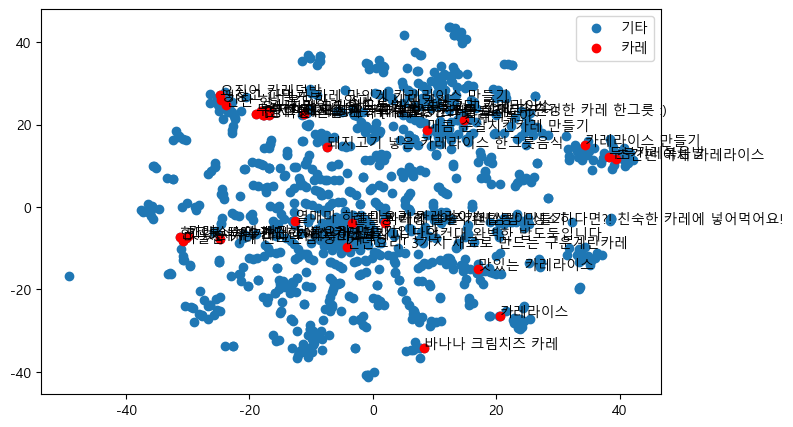

In [74]:


# tsne를 사용하여 차원 축소를 수행합니다.


# 첫 번째 레시피의 인덱스를 가져옵니다.
first_recipe_index = 0

# 축소된 데이터에서 첫 번째 레시피와 가장 가까운 레시피의 인덱스를 찾습니다.
closest_recipe_index = np.argmin(np.linalg.norm(reduced_recipe - reduced_recipe[first_recipe_index], axis=1))

# 첫 번째 레시피와 가장 가까운 레시피의 인덱스를 가져옵니다.
second_recipe_index = np.argmin(np.linalg.norm(reduced_recipe - reduced_recipe[first_recipe_index + 1], axis=1))

# 축소된 데이터를 시각화합니다.
plt.figure(figsize=(8, 5))
plt.scatter(reduced_recipe[:, 0], reduced_recipe[:, 1])

# 첫 번째 레시피와 가장 가까운 레시피의 좌표를 가져옵니다.
first_recipe_coordinate = reduced_recipe[first_recipe_index]
second_recipe_coordinate = reduced_recipe[second_recipe_index]
recipe_title = matrix_raw.recipe_title
# 첫 번째 레시피와 가장 가까운 레시피의 타이틀을 그래프에 표시합니다.
idx =  [i for i, food_name in enumerate(recipe_title) if "카레" in food_name]
for i in idx :
    plt.annotate(recipe_title[i], reduced_recipe[i], size = 10)
    plt.scatter(reduced_recipe[i, 0], reduced_recipe[i, 1], c= 'red')
plt.legend(["기타", "카레"], loc="upper right")
plt.show()


In [42]:
reduced_recipe[0]

array([27.941307, -6.839696], dtype=float32)

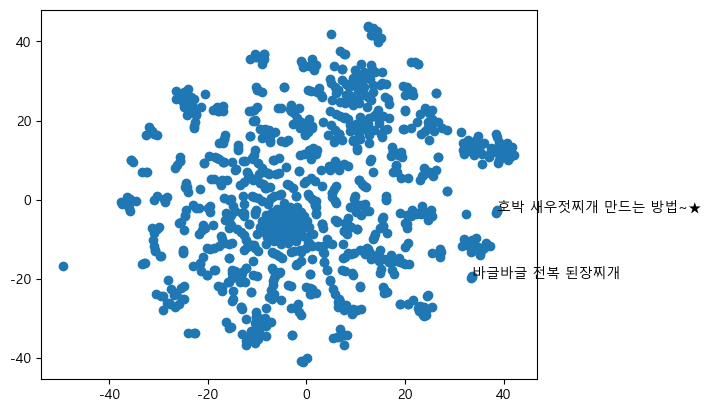

In [44]:
tsne = TSNE(n_components=2)
reduced_recipe = tsne.fit_transform(recipe_vec)

title = matrix_raw.recipe_title
plt.scatter(reduced_recipe[:, 0], reduced_recipe[:, 1])
plt.annotate(title[0], reduced_recipe[0])
plt.annotate(title[1], reduced_recipe[1])
plt.show()

In [193]:
recipe_vec.shape

(1000, 100)

In [201]:
data[0]

108.75084241972174

In [199]:
import numpy as np
from scipy.spatial.distance import cosine

# svd를 사용하여 차원 축소를 수행합니다.
u, s, v = np.linalg.svd(input)
data = u @ s



In [192]:
cosine(recipe_vec[0].reshape(-1), recipe_vec)

ValueError: Input vector should be 1-D.

In [188]:
closest_recipe_index = np.argmax(cosine(recipe_vec[0], recipe_vec))

ValueError: Input vector should be 1-D.